# Variable Description

InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation. 

StockCode: Product code that consists 5 digits. 

Description: Product name. 

Quantity: The quantities of each product per transaction. 

InvoiceDate: Represents the day and time when each transaction was generated. 

UnitPrice: Product price per unit. 

CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID. 

Country: Name of the country where each customer resides. 

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## DATA EXPLORATION


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## CLEAN DATA

In [6]:
#make copy for cleaning 
ec=df.copy()

In [7]:
# drop (nan) in columns that not effect in row of the data 
ec.dropna(subset=['Description'],inplace=True)
ec.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [10]:
#make canceled order in columns 
o=[]
for order in ec['InvoiceNo']:
    if order.startswith('C'):
        o.append('canceled')
    else:
        o.append("not canceled")
        
ec['order_c']=o

       
              

In [11]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
 8   order_c      540455 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 41.2+ MB


In [12]:
#make  date columns for more analysis 
ec['InvoiceDate']=pd.to_datetime(ec['InvoiceDate'])
ec['In_year']=pd.DatetimeIndex(ec['InvoiceDate']).year
ec['In_month'] = pd.to_datetime(ec['InvoiceDate']).dt.month_name()
ec['In_day'] = pd.to_datetime(ec['InvoiceDate']).dt.day_name()
ec['In_hour']=pd.DatetimeIndex(ec['InvoiceDate']).hour

In [15]:
ec.groupby('In_year')['In_month'].value_counts()

In_year  In_month 
2010     December     42356
2011     November     84636
         October      60638
         September    50127
         July         39363
         May          36892
         June         36783
         March        36583
         August       35202
         January      35033
         April        29690
         February     27642
         December     25510
Name: In_month, dtype: int64

In [15]:
#make column for all Quantities  
ec['price']=ec['UnitPrice']*ec['Quantity']

## Visualizing Data

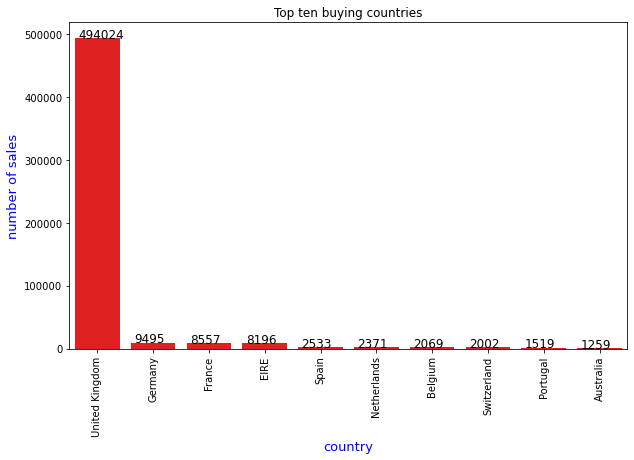

In [16]:
#Top ten buying countries
x=ec['Country'].value_counts().iloc[:10]
ax=plt.figure(figsize=(10,6))
ax=sns.barplot(x=x.index,y=x,color='red')
plt.xticks(rotation=90)
plt.xlabel('country',fontsize=13,color='blue')
plt.ylabel('number of sales',fontsize=13,color='blue')
plt.title('Top ten buying countries')
for i in ax.patches:
    ax.text(i.get_x()+.06,i.get_height()+2.4,str(int((i.get_height()))),
            rotation=0,fontsize=12,color='black')
plt.show()

# ax.set(facecolor = "blue")


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


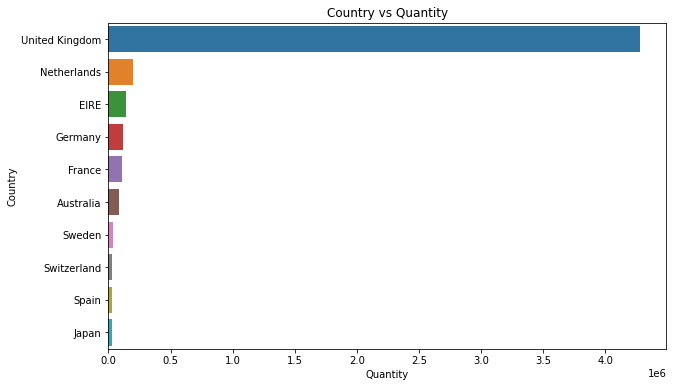

In [17]:
#Comparison of the best countries in the number of products
b=ec.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:10]
ax=plt.figure(figsize=(10,6))
ax=sns.barplot(b,b.index)
plt.title('Country vs Quantity')
plt.show()

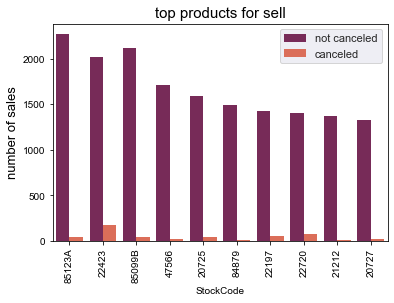

In [18]:
#which products have best sell & most canceled
sns.countplot(x='StockCode',data=ec, order=ec.StockCode.value_counts().iloc[:10].index,hue='order_c',palette="rocket") 
plt.xticks(rotation=90)
sns.set_theme()
plt.legend()
plt.ylabel('number of sales',fontsize=13)
plt.title('top products for sell',fontsize=15)
plt.show()

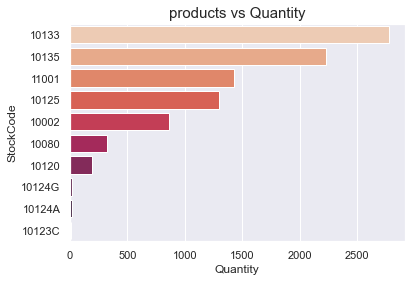

In [19]:
#which products sold by Quantity
p_q=ec.groupby('StockCode')['Quantity'].sum().iloc[:10].sort_values(ascending=False)
sns.barplot(x=p_q,y=p_q.index,palette='rocket_r')
plt.title('products vs Quantity',fontsize=15)
plt.show()

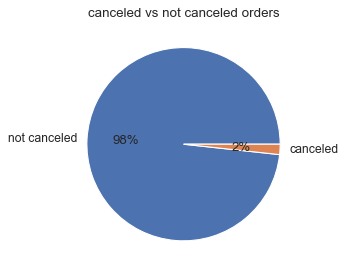

In [20]:
#the percentage of canceled orders
c=ec['order_c'].value_counts()
labels=c.index
plt.figure(dpi=80)
plt.pie(x=c,autopct='%0.0f%%',labels=labels)
plt.title('canceled vs not canceled orders')
plt.show()

In [21]:
ec.groupby('In_year')['In_month'].value_counts()


In_year  In_month 
2010     December     42356
2011     November     84636
         October      60638
         September    50127
         July         39363
         May          36892
         June         36783
         March        36583
         August       35202
         January      35033
         April        29690
         February     27642
         December     25510
Name: In_month, dtype: int64

As we can see the only one month in 2010 sow we can't make comparison for each year. 
So we will get deeper just in 2011 year

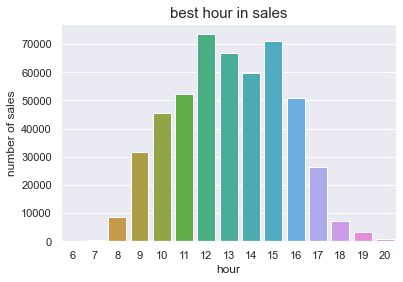

In [42]:
month=ec[ec['In_year']==2011]
sns.countplot(x=month['In_hour'])
plt.title('best hour in sales',fontsize=15)
plt.xlabel('hour',fontsize=12)
plt.ylabel('number of sales',fontsize=12)
plt.show()

as we sow the most country deal with  this E-Commerce is united kingdom so will be more focuse 

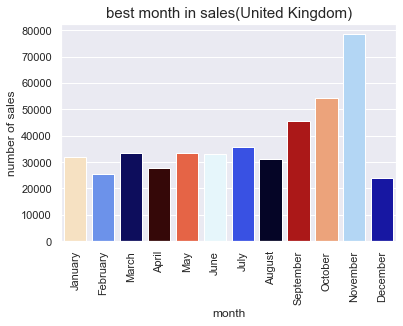

In [68]:
x=ec[(ec['In_year']==2011)&(ec['Country']=='United Kingdom')]
sns.countplot(x=x['In_month'],palette="flag")
plt.xticks(rotation=90)
plt.title('best month in sales(United Kingdom)',fontsize=15)
plt.xlabel('month',fontsize=12)
plt.ylabel('number of sales',fontsize=12)
plt.show()

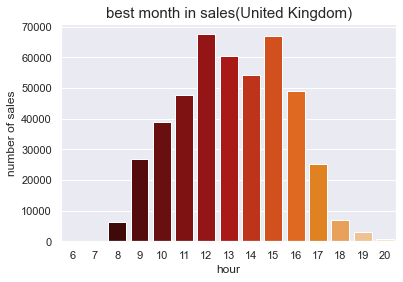

In [70]:
x=ec[(ec['In_year']==2011)&(ec['Country']=='United Kingdom')]
sns.countplot(x=x['In_hour'],palette="gist_heat")
plt.title('best month in sales(United Kingdom)',fontsize=15)
plt.xlabel('hour',fontsize=12)
plt.ylabel('number of sales',fontsize=12)
plt.show()